In [1]:
import os, sys, pickle
%pylab inline
plt.style.use("default")

Populating the interactive namespace from numpy and matplotlib


In [6]:
base_dir = os.path.split(os.getcwd())[0]
sys.path.append(base_dir)

In [7]:
from classify import get_output_root

In [9]:
osn_dataset = "gamp5"
params      = "default"
prefix = os.path.join(get_output_root(osn_dataset), params) + "/"
files = {"conc":f"{prefix}conc_orig.p",
         "conc_shuf":f"{prefix}conc_shuf.p",
         "delay.conc":f"{prefix}delay.conc_orig.p",
         "delay.conc_shuf":f"{prefix}delay.conc_shuf.p"
}
def load_file(f):
    with open(f,"rb") as ff:
        return pickle.load(ff)

data = {fld:load_file(fl) for fld, fl in files.items()}

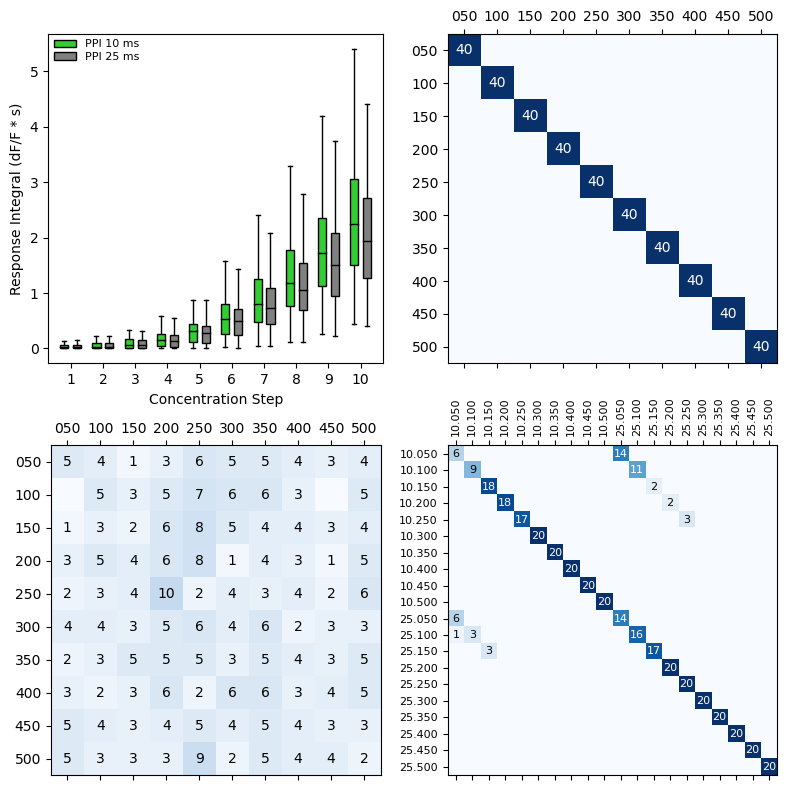

In [10]:
figure(figsize=(8,8))
subplot(2,2,1)
concs = data["conc"]["labels"]
delay_concs = data["delay.conc"]["labels"]
X     = data["delay.conc"]["X"]
y     = data["delay.conc"]["y"]
resps = {10:array([X[array(y)==f"10.{int(c):03d}"].flatten() for c in concs]).T,
         25:array([X[array(y)==f"25.{int(c):03d}"].flatten() for c in concs]).T}
concs = sorted(list(set(yi.split(".")[1] for yi in y)))
centers= arange(len(concs))
bplots = []
for (ppi, color, offset) in [(10, "limegreen", -0.2), (25, "gray", 0.2)]:
    pos   = centers + offset
    bplots.append(boxplot(resps[ppi], showfliers=False, patch_artist = True, medianprops={"color":"black", "linewidth":1}, positions=pos, widths=0.25))
    [b.set_facecolor(color) for b in bplots[-1]["boxes"]]
gca().set_xticks(centers)
gca().set_xticklabels(arange(1,len(concs)+1))
xlabel("Concentration Step"); ylabel("Response Integral (dF/F * s)")
#gca().set_yticks(arange(0,5))
legend([bp["boxes"][0] for bp in bplots],["PPI 10 ms", "PPI 25 ms"], loc="upper left", fontsize=8, labelspacing=0.25,frameon=False, borderpad=0)

# Now the confusion matrix for concentration
cm_conc   = data["conc"]["confusion_matrix"]
label_cm  = lambda cm,th,fsz=10: [text(j,i,cm[i,j],fontsize=fsz,verticalalignment="center", horizontalalignment="center", color="w" if cm[i,j] > th else "k") if cm[i,j] else [] for j in range(cm.shape[1]) for i in range(cm.shape[0])]
set_ticks = lambda labs: [(ticks_fun(arange(len(labs))), tickslabel_fun(labs)) for (ticks_fun, tickslabel_fun) in [(gca().set_xticks, gca().set_xticklabels), (gca().set_yticks, gca().set_yticklabels)]]
subplot(2,2,2); matshow(data["conc"]["confusion_matrix"],       fignum=False, cmap=cm.Blues, vmin=0, vmax=sum(cm_conc[0])); label_cm(data["conc"]["confusion_matrix"], 20); set_ticks(concs);
subplot(2,2,3); matshow(data["conc_shuf"]["confusion_matrix"],  fignum=False, cmap=cm.Blues, vmin=0, vmax=sum(cm_conc[0])); label_cm(data["conc_shuf"]["confusion_matrix"], 20); set_ticks(concs);
subplot(2,2,4); matshow(data["delay.conc"]["confusion_matrix"], fignum=False, cmap=cm.Blues); label_cm(data["delay.conc"]["confusion_matrix"], 10, 8)
gca().set_xticks(arange(len(delay_concs))); gca().set_xticklabels(delay_concs,fontsize=8, rotation=90)
gca().set_yticks(arange(len(delay_concs))); gca().set_yticklabels(delay_concs,fontsize=8)
tight_layout()